# Reto Clasificación flores
### Cargamos las librerías y las funciones a utilizar

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns

# Cargmos los datos del conjunto de datos Iris

In [2]:
data = load_iris()
X = data.data
y_true = data.target
n_classes = len(np.unique(y_true))

# Entrenar K-Means (con 3 clústeres para las 3 clases)

In [3]:
# Binarizar las etiquetas para el cálculo de la curva ROC y AUC
y_true_binarized = label_binarize(y_true, classes=[0, 1, 2])
y_true_binarized
# Entrenar K-Means (con 3 clústeres para las 3 clases)
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Asignar las etiquetas a los clústeres resultantes

In [4]:
labels = np.zeros_like(y_kmeans)
for i in range(3):
    mask = (y_kmeans == i)
    labels[mask] = mode(y_true[mask])[0]

# Calcular Accuracy, F1-Score, Recall y Precisión

In [5]:
accuracy = accuracy_score(y_true, labels)
f1 = f1_score(y_true, labels, average='macro')
recall = recall_score(y_true, labels, average='macro')
precision = precision_score(y_true, labels, average='macro')

# Calcular la especificidad para cada clase: TN / (TN + FP)

In [6]:
cm = confusion_matrix(y_true, labels)
specificity = []
for i in range(3):
    tn = cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])
    fp = cm[:, i].sum() - cm[i, i]
    specificity.append(tn / (tn + fp))
specificity = np.mean(specificity)

# Imprimir las métricas para K-Means

In [7]:
print(f"Métricas para K-Means:")
print(f"Exactitud (Accuracy): {accuracy:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Recall (Sensibilidad): {recall:.2f}")
print(f"Precisión: {precision:.2f}")
print(f"Especificidad: {specificity:.2f}")

Métricas para K-Means:
Exactitud (Accuracy): 0.89
F1-Score: 0.89
Recall (Sensibilidad): 0.89
Precisión: 0.91
Especificidad: 0.95


# Mostrar la matriz de confusión con Seaborn para K-Means

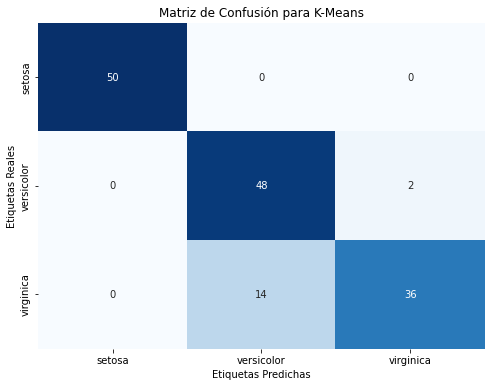

In [8]:
# Mostrar la matriz de confusión con Seaborn para K-Means
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Etiquetas Predichas")
plt.ylabel("Etiquetas Reales")
plt.title("Matriz de Confusión para K-Means")
plt.show()

# Entrenar el modelo MLP

In [9]:
mlp = MLPClassifier(hidden_layer_sizes=(3, 3), solver='adam', learning_rate_init=0.001, max_iter=1000, random_state=42)
mlp.fit(X, y_true)

c:\Users\Daniel Calderon\.conda\envs\myenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(hidden_layer_sizes=(3, 3), max_iter=1000, random_state=42)

# Evaluar el modelo MLP

In [10]:
y_pred_mlp = mlp.predict(X)

# Calcular Accuracy, F1-Score, Recall y Precisión para MLP

In [11]:
accuracy_mlp = accuracy_score(y_true, y_pred_mlp)
f1_mlp = f1_score(y_true, y_pred_mlp, average='macro')
recall_mlp = recall_score(y_true, y_pred_mlp, average='macro')
precision_mlp = precision_score(y_true, y_pred_mlp, average='macro')

# Calcular la especificidad para cada clase: TN / (TN + FP)

In [12]:
cm_mlp = confusion_matrix(y_true, y_pred_mlp)
specificity = []
for i in range(3):
    tn = cm_mlp.sum() - (cm_mlp[i, :].sum() + cm_mlp[:, i].sum() - cm_mlp[i, i])
    fp = cm_mlp[:, i].sum() - cm_mlp[i, i]
    specificity.append(tn / (tn + fp))
specificity_mlp = np.mean(specificity)

# Imprimir las métricas para MLP

In [13]:
print(f"\nMétricas para MLP:")
print(f"Exactitud (Accuracy): {accuracy_mlp:.2f}")
print(f"F1-Score: {f1_mlp:.2f}")
print(f"Recall (Sensibilidad): {recall_mlp:.2f}")
print(f"Precisión: {precision_mlp:.2f}")
print(f"Especificidad: {specificity_mlp:.2f}")


Métricas para MLP:
Exactitud (Accuracy): 0.98
F1-Score: 0.98
Recall (Sensibilidad): 0.98
Precisión: 0.98
Especificidad: 0.99


# Mostrar la matriz de confusión con Seaborn para MLP

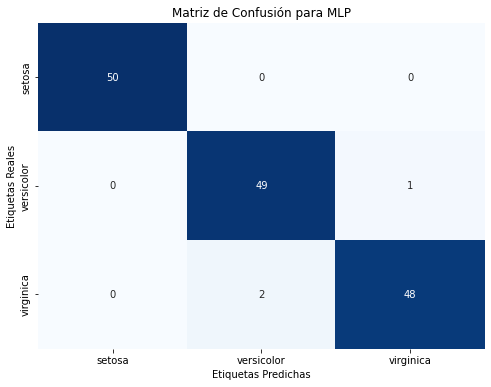

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlp, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Etiquetas Predichas")
plt.ylabel("Etiquetas Reales")
plt.title("Matriz de Confusión para MLP")
plt.show()

# Generar Curva ROC y calcular AUC para MLP

In [15]:
y_score_mlp = mlp.predict_proba(X)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_score_mlp[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Mostrar las curvas ROC para cada clase

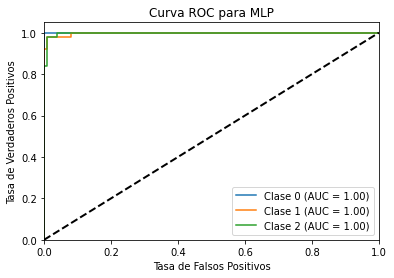

In [16]:
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Clase {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para MLP')
plt.legend(loc="lower right")
plt.show()

# Explicación de métricas de evaluación de modelos

Este documento explica las métricas de evaluación utilizadas en dos modelos de clasificación aplicados al conjunto de datos **Iris**. Los modelos incluyen una **Clusterización** y un **Perceptrón Multicapa**. A continuación, se describen las métricas: precisión, recall (sensibilidad), F1-score, exactitud (accuracy), especificidad, y AUC-ROC, con su respectiva explicación matemática y cómo se implementan en el código.

---

## 1. Precisión (Precision)

La **precisión** mide la proporción de verdaderos positivos (TP) sobre el total de instancias clasificadas como positivas (TP + FP). Es útil cuando el costo de los falsos positivos es alto.

**Fórmula:**

$$
Precision = \frac{TP}{TP + FP}
$$

**En el código:** Se utiliza la función `precision_score()` de `sklearn.metrics`.

---

## 2. Recall (Sensibilidad)

El **recall** o **sensibilidad** mide la proporción de verdaderos positivos (TP) sobre el total de instancias que son realmente positivas (TP + FN). Es útil cuando el costo de los falsos negativos es alto.

**Fórmula:**

$$
Recall = \frac{TP}{TP + FN}
$$

**En el código:** Se utiliza la función `recall_score()` de `sklearn.metrics`.

---

## 3. F1-Score

El **F1-score** es la media armónica entre precisión y recall. Se utiliza cuando se quiere un balance entre estas dos métricas, especialmente en casos de datos desbalanceados.

**Fórmula:**

$$
F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}
$$

**En el código:** Se calcula con la función `f1_score()` de `sklearn.metrics`.

---

## 4. Exactitud (Accuracy)

La **exactitud** mide la proporción de predicciones correctas (verdaderos positivos y verdaderos negativos) sobre el total de predicciones.

**Fórmula:**

$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

**En el código:** Se implementa utilizando la función `accuracy_score()` de `sklearn.metrics`.

---

## 5. Especificidad

La **especificidad** mide la proporción de verdaderos negativos (TN) sobre el total de instancias que son realmente negativas (TN + FP). Es útil para evaluar cómo el modelo evita clasificar incorrectamente instancias negativas como positivas.

**Fórmula:**

$$
Specificity = \frac{TN}{TN + FP}
$$

**En el código:** Se implementa manualmente con la función `calcular_especificidad()`, que utiliza la matriz de confusión (`confusion_matrix()`).

---

## 6. Curva ROC y AUC

La **curva ROC** muestra la relación entre la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR) a diferentes umbrales de clasificación.

El **AUC** (Área Bajo la Curva) mide el área bajo la curva ROC. Un AUC cercano a 1 indica un buen desempeño del modelo para distinguir entre clases.

**En el código:** Se utiliza `roc_curve()` y `roc_auc_score()` para calcular y graficar la curva ROC para cada clase.

---

## 7. Matriz de Confusión

La **matriz de confusión** muestra el número de verdaderos positivos (TP), verdaderos negativos (TN), falsos positivos (FP) y falsos negativos (FN) para cada clase, permitiendo visualizar los errores de clasificación.

**En el código:** La matriz de confusión se grafica utilizando `confusion_matrix()` y la función `graficar_matriz_confusion()`, que genera un heatmap de la matriz.

---

## Resumen de las Funciones Utilizadas:

- **`precision_score()`**: Calcula la precisión (macro promedio).
- **`recall_score()`**: Calcula el recall o sensibilidad (macro promedio).
- **`f1_score()`**: Calcula el F1-score (macro promedio).
- **`accuracy_score()`**: Calcula la exactitud de las predicciones.
- **`calcular_especificidad()`**: Calcula la especificidad para cada clase y retorna el promedio.
- **`roc_curve()`** y **`roc_auc_score()`**: Calculan la curva ROC y el área bajo la curva.
- **`confusion_matrix()`**: Genera la matriz de confusión.
- **`graficar_matriz_confusion()`**: Grafica la matriz de confusión usando Seaborn.

## Modelos Evaluados:

Los modelos evaluados incluyen:

1. **Gaussian Naive Bayes** (`KMeans`).
2. **C-Support Vector Classification** (`SMLPClassifier`).

Cada modelo es entrenado con el conjunto de datos Iris y evaluado usando las métricas mencionadas. Las matrices de confusión y las curvas ROC de cada modelo se grafican para una mejor visualización del rendimiento.

---

# Análisis Comparativo de Modelos de Clasificación

En esta sección, se presenta una comparación entre dos modelos de clasificación: **K-Means** y **Red Neuronal MLP**. Los modelos se evaluaron utilizando las siguientes métricas: **Precisión**, **Recall (Sensibilidad)**, **F1-score**, **Accuracy** y **Especificidad**.

## Resultados de los Modelos

### 1. K-Means

- **Precisión**: 0.91
- **Recall (Sensibilidad)**: 0.89
- **F1-score**: 0.89
- **Accuracy**: 0.89
- **Especificidad**: 0.95

### 2. Red Neuronal MLP

- **Precisión**: 0.98
- **Recall (Sensibilidad)**: 0.98
- **F1-score**: 0.98
- **Accuracy**: 0.98
- **Especificidad**: 0.99

## Comparación de Resultados

### Precisión
- **Red Neuronal MLP**: 0.98
- **K-Means**: 0.91

**Red Neuronal MLP** tiene la mayor precisión, indicando que es el modelo más preciso en la clasificación de las instancias.

### Recall (Sensibilidad)
- **Red Neuronal MLP**: 0.98
- **K-Means**: 0.89

**Red Neuronal MLP** también tiene el mayor recall, mostrando que identifica un mayor porcentaje de casos positivos.

### F1-score
- **Red Neuronal MLP**: 0.98
- **K-Means**: 0.89

La **Red Neuronal MLP** logra el mejor F1-score, indicando un balance óptimo entre precisión y recall.

### Accuracy
- **Red Neuronal MLP**: 0.98
- **K-Means**: 0.89

**Red Neuronal MLP** presenta la mayor exactitud general, lo que significa que es el modelo más consistente en clasificar correctamente las instancias.

### Especificidad
- **Red Neuronal MLP**: 0.99
- **K-Means**: 0.95

**Red Neuronal MLP** tiene la mejor especificidad, lo que indica que es el mejor en identificar correctamente las instancias negativas.

## Conclusión

En base a las métricas evaluadas, **Red Neuronal MLP** se destaca como el mejor modelo entre los dos en esta práctica. Ofrece la mayor precisión, recall, F1-score, exactitud y especificidad. Esto sugiere que el modelo MLP no solo es el más preciso, sino que también maneja de manera efectiva tanto los positivos como los negativos en la clasificación, proporcionando una clasificación robusta y generalizable.

**K-Means** tiene un rendimiento sólido para ser un algoritmo no supervisado, pero es inferior en comparación con MLP en todas las métricas. Ambos modelos son útiles, pero la **Red Neuronal MLP** ofrece una ventaja significativa en términos de rendimiento general.
